## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.loc[:,"company"].value_counts()

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64

## About the dataset:
This [data article](https://www.sciencedirect.com/science/article/pii/S2352340918315191#s0005) describes a datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). the dataset contains 32 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. the dataset comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, this dataset can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields. 
You can download the Hotel Booking Demand dataset from the Kaggle [click here](https://www.kaggle.com/jessemostipak/hotel-booking-demand).

## Attribute Information:
- **hotel**: Hotel (Resort Hotel, City Hotel)
- **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
- **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year**: Year of arrival date
- **arrival_date_month**: Month of arrival date
- **arrival_date_week_number**: Week number of year for arrival date
- **arrival_date_day_of_month**: Day of arrival date
- **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults**: Number of adults
- **children**: Number of children
- **babies**: Number of babies
- **meal**: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**: ID of the travel agency that made the booking
- **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces**: Number of car parking spaces required by the customer
- **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 32)

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Does the type of payment affect the cancellation of the reservation or not?

In [8]:
df["is_canceled"].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [9]:
x = df["deposit_type"].replace({'No Deposit':1,'Non Refund':2,'Refundable':3})
x = x[df["is_canceled"]==1]
x.value_counts()

deposit_type
1    29694
2    14494
3       36
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x24041b5c850>,
 [Text(-0.5642390379394746, 0.944263897469948, 'No Deposit'),
  Text(0.5618223208744978, -0.9457038012862129, 'Non Refund'),
  Text(1.099996402684838, -0.002813197543010875, 'Refundable')],
 [Text(-0.3077667479669861, 0.5150530349836079, '67.1%'),
  Text(0.30644853865881694, -0.515838437065207, '32.8%'),
  Text(0.5999980378280934, -0.0015344713870968406, '0.1%')])

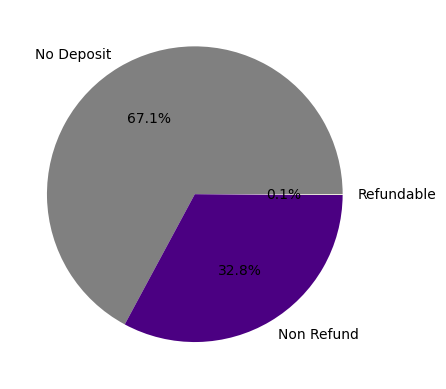

In [10]:
plt.pie(
    x.value_counts(),labels=['No Deposit','Non Refund','Refundable'],colors =["grey", "indigo", "beige"],autopct='%1.1f%%'
)

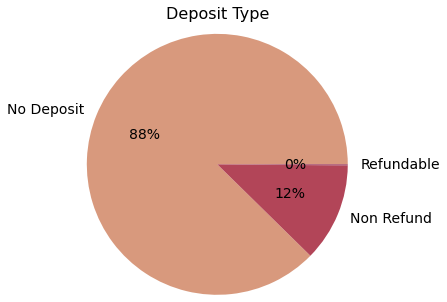

### Insights:
- People do not trust a deposit to guarantee a booking.
- Most of those who booked through the no-deposit method canceled their reservations..-



## Does length of time between the entering date of the booking and the arrival date affect the cancellation?

In [11]:
df["previous_cancellations"].value_counts()

previous_cancellations
0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: count, dtype: int64

In [12]:
a=df.groupby("previous_cancellations").size().reset_index()
total_sum = a[0].sum()
a["percentage"] = (a["previous_cancellations"] / total_sum) * 100
a

,previous_cancellations,0,percentage
0,0,112906,0.000000
1,1,6051,0.000838
2,2,116,0.001675
3,3,65,0.002513
4,4,31,0.003350
5,5,19,0.004188
6,6,22,0.005026
7,11,35,0.009214
8,13,12,0.010889
9,14,14,0.011726


In [13]:
df.groupby("previous_cancellations").size().reset_index()

,previous_cancellations,0
0,0,112906
1,1,6051
2,2,116
3,3,65
4,4,31
5,5,19
6,6,22
7,11,35
8,13,12
9,14,14


In [62]:
a= df.groupby(["previous_cancellations","lead_time"])
A=list(a.groups.keys())
x_coords, y_coords = zip(*A)

<Axes: >

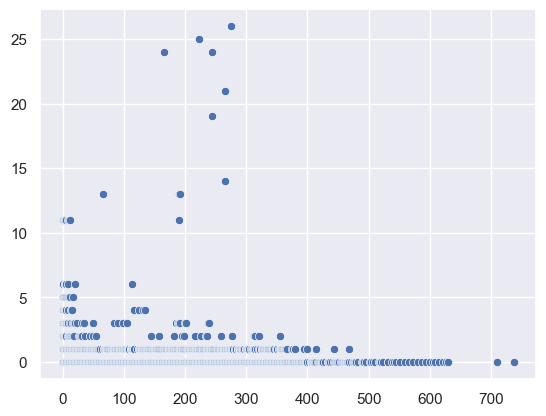

In [52]:
sns.scatterplot(x=y_coords ,  y =x_coords
)

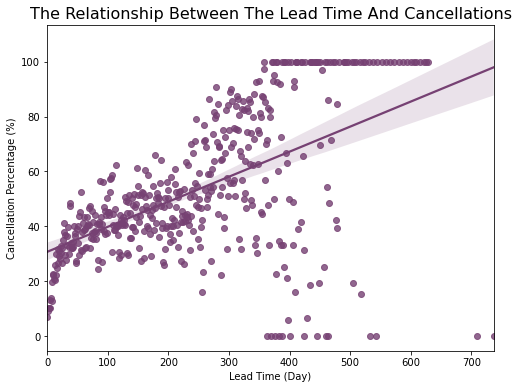

### Insights:
YSE
- Entering the reservation date and arrival date significantly influences the likelihood of cancellation. As the number of days increases, there is a greater possibility of reservations being canceled, especially when the booking extends beyond 300 days. The probability of the reservations being canceled can reach up to 100%. Conversely, if the booking period is less than 300 days, the cancellation probability drops to a maximum of 30%.




## Which months that have lowest number of visitors?

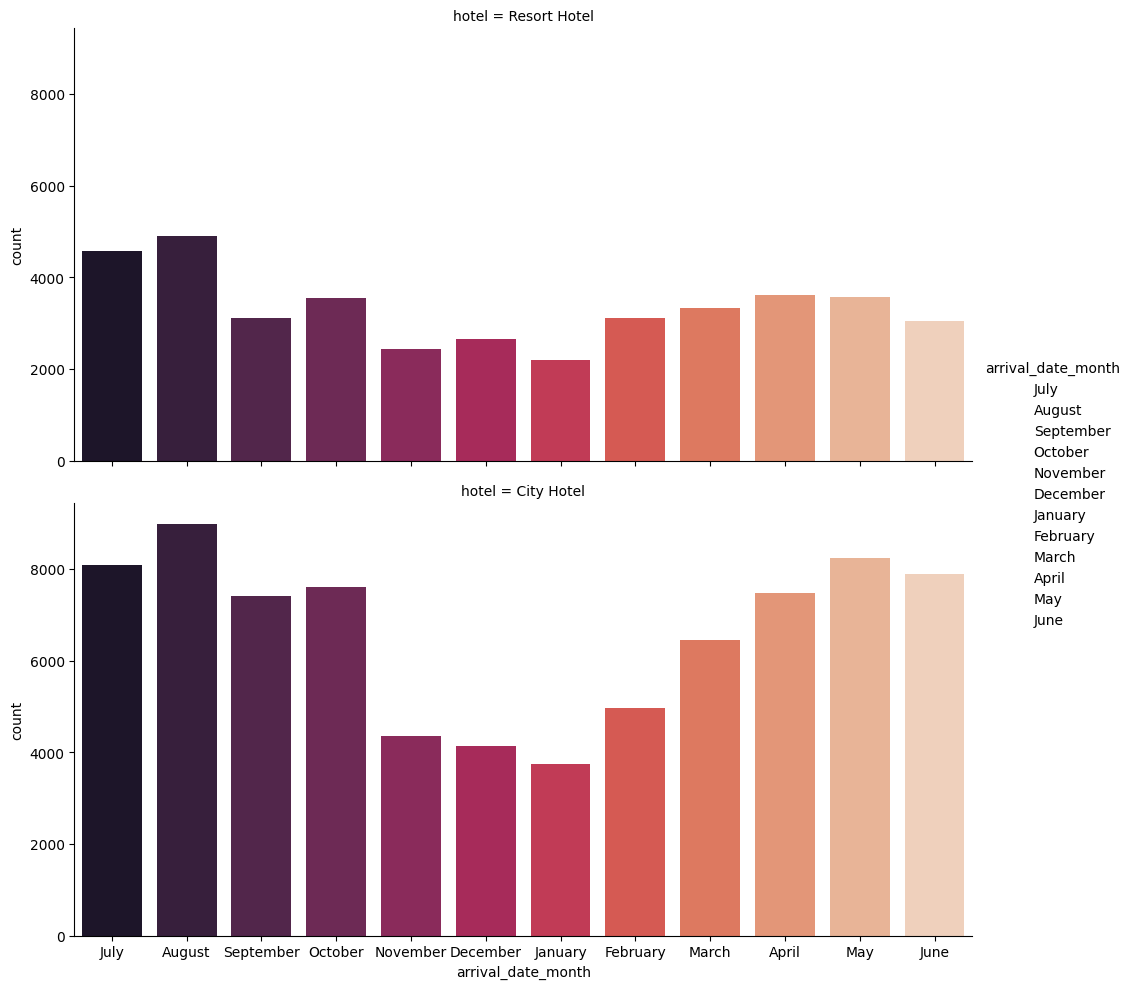

In [17]:
sns.catplot(df,x=df["arrival_date_month"],kind="count",row="hotel",aspect=2,palette="rocket")

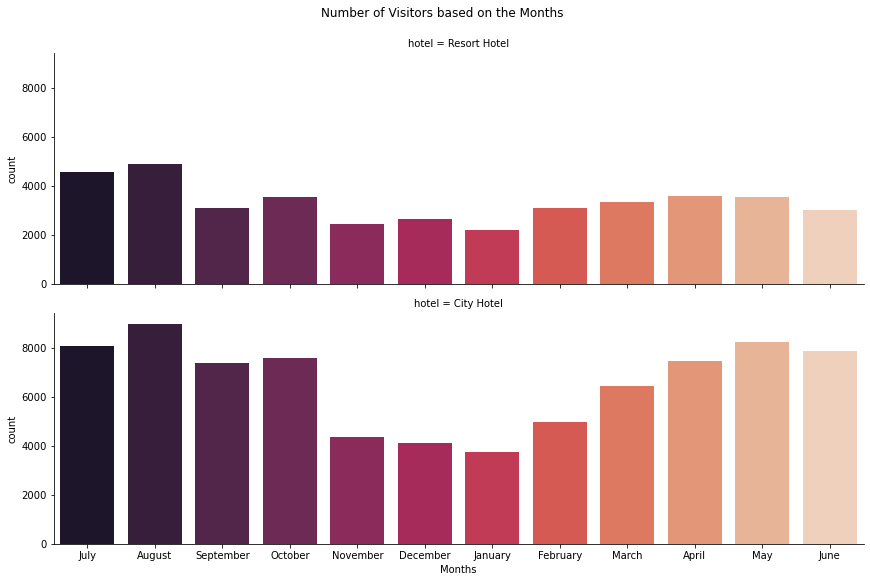

- The lowest number of visitors in the resort hotel was in January
- The lowest number of visitors in the city hotel was in January

## Check if the lowest number of visitors due to the increase in the number of the canceled reservations?

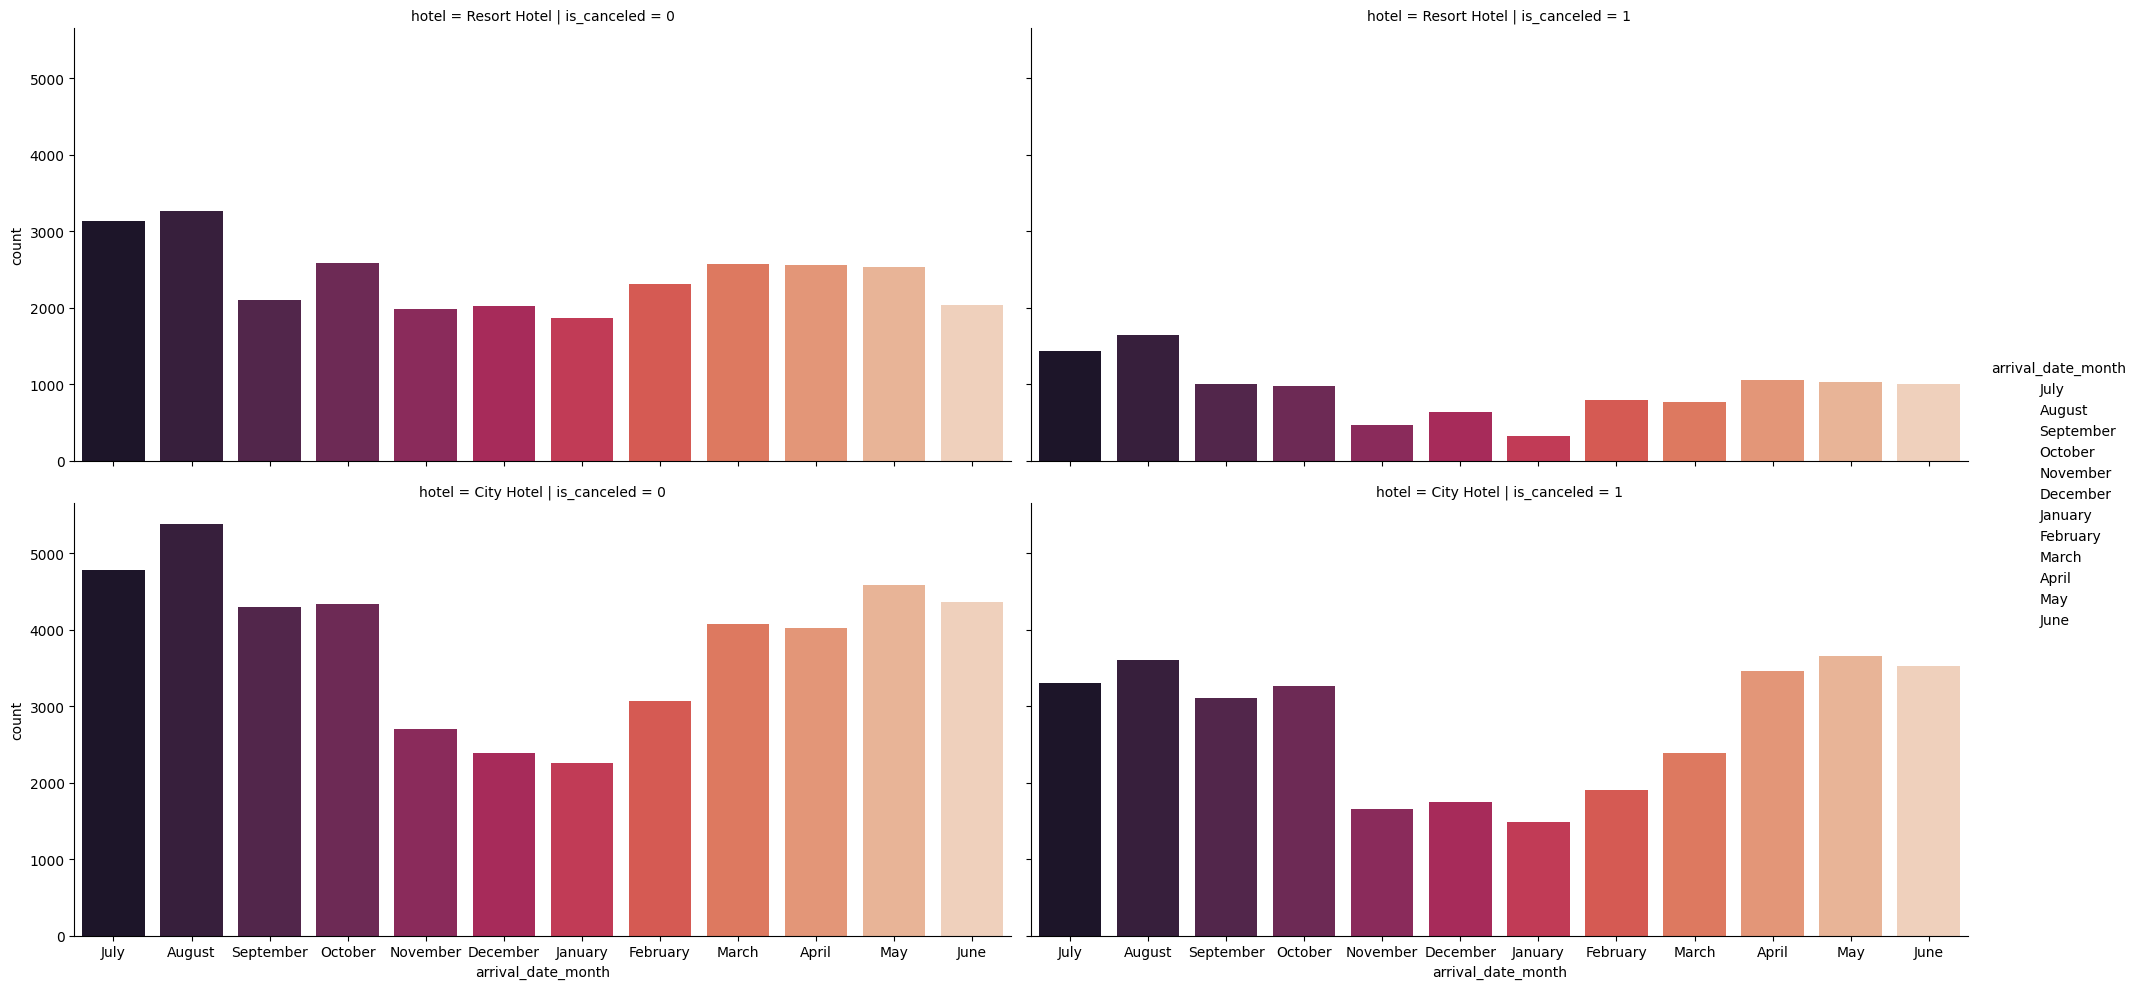

In [18]:
sns.catplot(df,x=df["arrival_date_month"],kind="count",row="hotel",aspect=2,palette="rocket",col=df["is_canceled"])

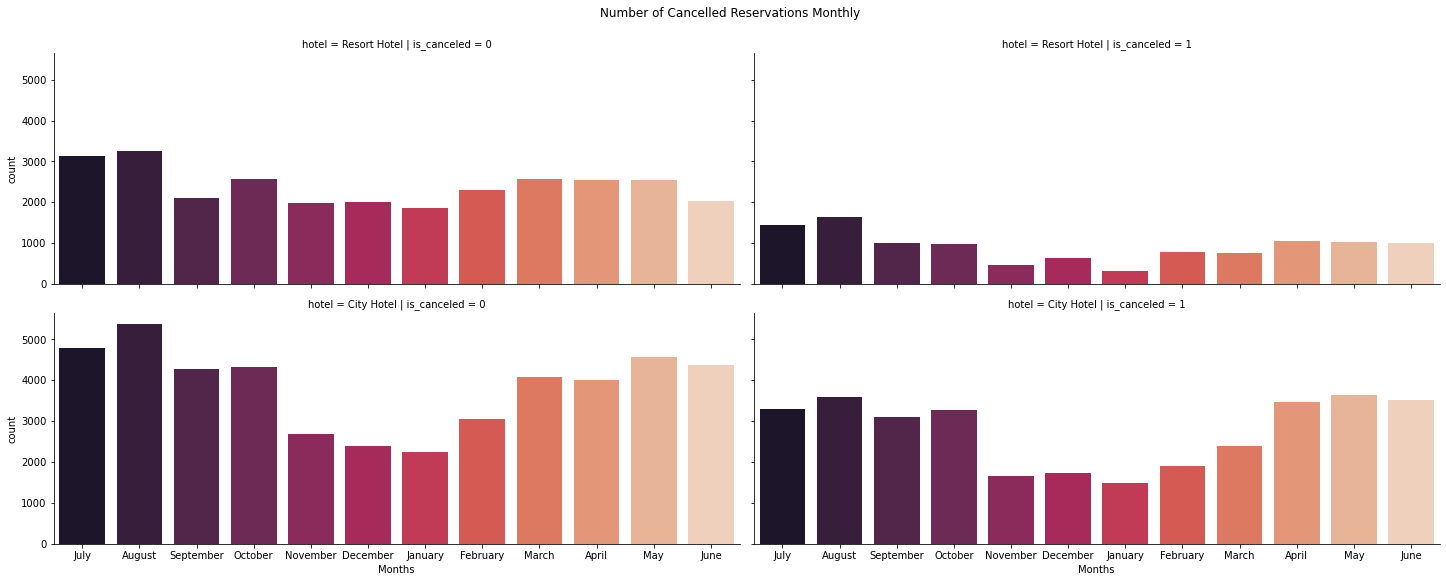

### Insights:
- The resort hotel and city hotel experienced the lowest number of visitors in January, and this was not due to an increase in the number of canceled reservations. In that month, most visitors did not cancel their reservations.
 The highest number of canceled reservations occurred in August for both the hotel and city.


 
-


## Which top 10 countries that visitors come from?      

In [19]:
df["country"].value_counts().index.tolist()[:10]

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

In [20]:
x =df["country"].value_counts().tolist()[:10]
x

[48590, 12129, 10415, 8568, 7287, 3766, 3375, 2342, 2224, 2104]

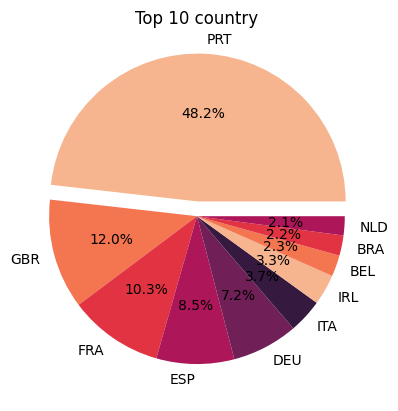

In [21]:
colors = sns.color_palette('rocket')[::-1]
plt.pie(
    x,labels=df["country"].value_counts().index.tolist()[:10],autopct='%1.1f%%',explode = [0.1,0,0,0,0,0,0,0,0,0],colors=colors
)
plt.title("Top 10 country")
plt.show()

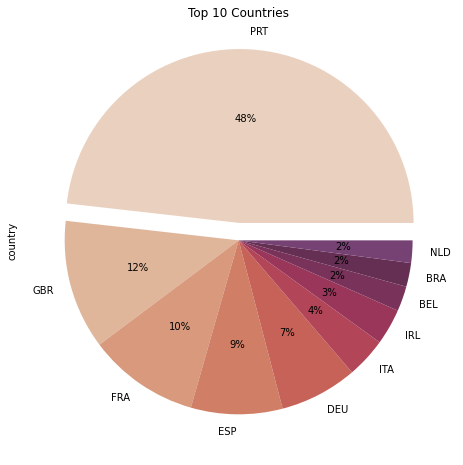

### Insights:
| Code | Full Name | Image |
|---|---|---|
| PRT | Portugal 48%g) |
| GBR | United Kingdom12%g) |
| FRA | Franc10%.png) |
| ESP | Spa9%png) |
| DEU | Germ7%g.png) |
| ITA | I4%ag.png) |
| IRL | Ir3%lag.png) |
| BEL | B2%flag.png) |
| BRA 2%flag.png) |
| NLD | Net2%s-
<hr>f. Portugal accounts for the largest share of visitors, with 48% of the total.

. The remaining countries (GBR, FRA, ESP, DEU, ITA, IRL, BEL, BRA, NLD) collectively account for 52% of the total visitors.lag.png) |


## Relation between booking changes and cancelling the reservation

<Axes: xlabel='is_canceled', ylabel='booking_changes'>

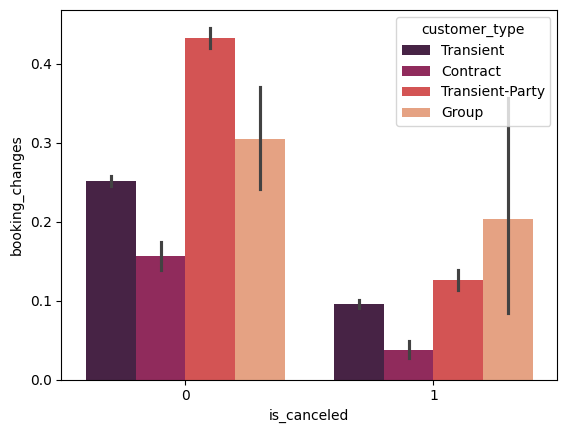

In [22]:
sns.barplot(df, x= df["is_canceled"], y=df["booking_changes"], hue=df["customer_type"],palette="rocket")

### Insights:
- The group made significant changes to their booking, and then they canceled.

- Transient parties make more changes to their booking than any other type of customer.


# Data Preprocessing

In [23]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [24]:
# Drop the columns with null values
df = df.drop(['agent' ,'company', 'country'], axis=1, errors="ignore")

In [25]:
df.dropna(subset = ["children"], inplace=True)

In [26]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [27]:
df = df.drop(['hotel','arrival_date_month','meal','customer_type',
              'market_segment', 'distribution_channel','assigned_room_type',
              'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status', 
              'reservation_status_date'], axis=1, errors="ignore")

In [28]:
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [29]:
X, y = df.drop(['is_canceled'],axis=1), df['is_canceled']

### Choose any machine learning algorithm to predict cancellation

- use train-test split
- use cross-validation split
- use hyperparameter tuning

# train-test split

In [30]:
from sklearn.model_selection import train_test_split, cross_val_predict, RepeatedStratifiedKFold, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_t = RandomForestClassifier()
rf_t.fit(X_train, y_train)
y_p = rf_t.predict(X_test)

In [68]:
print("score of the training data :",rf.score(X_train,y_train))
print("score of the testing data :",rf.score(X_test,y_test))
print(f'The accuracy of the model : {accuracy_score(y_test, y_p)}')
print(f'The Sensitivity of the model : {recall_score(y_test, y_p)}')
Specificity= 19/(19+2)
print(f'The Specificity of the model : {Specificity}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_p)}')

score of the training data : 0.9897903152251808
score of the testing data : 0.8514113409833319
The accuracy of the model : 0.8518301365273474
The Sensitivity of the model : 0.7309427153811457
The Specificity of the model : 0.9047619047619048
The AUC-ROC of the model : 0.8270969406352763


#  cross-validation split

In [63]:
from sklearn.model_selection import cross_val_score
rf_cv = RandomForestClassifier()
scores = cross_val_score(rf_cv,X_train,y_train,cv=10)
print(f' Random Forest List of scores :\n{scores}')

avg_scores = np.mean(scores)

print(f'Random Forest Average Score : {avg_scores}\n')

 Random Forest List of scores :
[0.84830154 0.84597487 0.84988367 0.85248953 0.8497906  0.853141
 0.84765007 0.85126582 0.84940432 0.84521593]
Random Forest Average Score : 0.8493117346307674



# hyperparameter tuning

In [33]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import \
     classification_report, confusion_matrix,\
     accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rf = RandomForestClassifier()

n_estimators = [100, 200]
criterion = ["gini", "entropy"]

rf_hyperparameters = dict(
    n_estimators=n_estimators,
    criterion=criterion
)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_hyperparameters,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy',
    error_score=0,
    return_train_score=True
)

start = time.time()
best_rf = grid_search.fit(X_train, y_train)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
y_pred = best_rf.predict(X_test)
end = time.time()

p_time = end - start

accu = accuracy_score(y_test, y_pred).round(4)
print("the time :",p_time)
print(f'The accuracy for the model : {accu}')
plot_conf_mtrix(best_rf.__class__.__name__, y_pred, y_test)
cls_report(best_rf.__class__.__name__, y_pred, y_test)

The model was trained successfuly.

the time : 0.9269976615905762
The accuracy for the model : 0.8537


NameError: name 'plot_conf_mtrix' is not defined

In [42]:
print('The classification report :-\n:',classification_report(y_test, y_pred))

The classification report :-
:               precision    recall  f1-score   support

           0       0.86      0.92      0.89      7505
           1       0.85      0.74      0.79      4434

    accuracy                           0.85     11939
   macro avg       0.85      0.83      0.84     11939
weighted avg       0.85      0.85      0.85     11939

